In [1]:
# Import packages
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from SeqSpaceDurable import solveSeqSpaceDurable
import time 

In [5]:
# Steady state values before permanent shock and after permanent shock
T = 1000 # time horizon needs to be longer for convergence to steady state

# create dictionary of Dold and Dnew
Dold = {}
Dnew = {}

# loop over eta_vec = [0, 0.5, 1]
for eta in [0, 0.5, 1]:
    # solve for Dold
    Dold[eta] = solveSeqSpaceDurable(horizon = T, eta=eta)
    Dold[eta].solve_steady_state()
    # solve for Dnew
    Dnew[eta] = solveSeqSpaceDurable(horizon = T, DC_ratio = 10.876, eta=eta)
    Dnew[eta].solve_steady_state()

In [6]:
# create dictionary of Path, Nx, Nc, Yx, Yc, w, X, C, r, D, Q
Path = {}
Nx = {}
Nc = {}
Yx = {}
Yc = {}
w = {}
X = {}
C = {}
r = {}
D = {}
Q = {}

# create dictionary of Pathlvl, Nxlvl, Nclvl, Yxlvl, Yclvl, wlvl, Xlvl, Clvl, rlvl, Dlvl, Qlvl
Pathlvl = {}
Nxlvl = {}
Nclvl = {}
Yxlvl = {}
Yclvl = {}
wlvl = {}
Xlvl = {}
Clvl = {}
rlvl = {}
Dlvl = {}
Qlvl = {}

# create dictionary of Patholdss, Path_relold, Nxrelold, Ncrelold, Yxrelold, Ycrelold, wrelold, Xrelold, Crelold, rrelold, Drelold, Qrelold
Patholdss = {}
Path_relold = {}
Nxrelold = {}
Ncrelold = {}
Yxrelold = {}
Ycrelold = {}
wrelold = {}
Xrelold = {}
Crelold = {}
rrelold = {}
Drelold = {}
Qrelold = {}

# loop over eta_vec = [0, 0.5, 1]
for eta in [0, 0.5, 1]:

    # plot transition path in response to permanent reallocation shock to durable goods
    Z = np.zeros((T, 1))
    D0 = np.zeros((T, 1))
    D0[0] = (Dold[eta].Dss - Dnew[eta].Dss) / Dnew[eta].Dss

    shocks = np.vstack((Z, D0))

    # Solve for transition path
    Path[eta] = Dnew[eta].solve_seqspace(shocks)
    Path[eta] = Path[eta].flatten()
    Nx[eta] = Path[eta][0:T]
    Nc[eta] = Path[eta][T:2*T]
    Yx[eta] = Path[eta][2*T:3*T]
    Yc[eta] = Path[eta][3*T:4*T]
    w[eta] = Path[eta][4*T:5*T]
    X[eta] = Path[eta][5*T:6*T]
    C[eta] = Path[eta][6*T:7*T]
    r[eta] = Path[eta][7*T:8*T]
    D[eta] = Path[eta][8*T:9*T]
    Q[eta] = Path[eta][9*T:10*T]

    # Order of variables: Nx, Nc, Yx, Yc, w, X, C, r, D, Q
    Pathss = np.zeros((10*T, 1)).flatten()
    Pathss[0:T] = Dnew[eta].Nxss
    Pathss[T:2*T] = Dnew[eta].Ncss
    Pathss[2*T:3*T] = Dnew[eta].Yxss
    Pathss[3*T:4*T] = Dnew[eta].Ycss
    Pathss[4*T:5*T] = Dnew[eta].wss
    Pathss[5*T:6*T] = Dnew[eta].Xss
    Pathss[6*T:7*T] = Dnew[eta].Css
    Pathss[7*T:8*T] = Dnew[eta].rss
    Pathss[8*T:9*T] = Dnew[eta].Dss
    Pathss[9*T:10*T] = Dnew[eta].Qss

    # Change SS deviation to levels
    Pathlvl[eta] = Path[eta]*Pathss + Pathss
    Nxlvl[eta] = Pathlvl[eta][0:T]
    Nclvl[eta] = Pathlvl[eta][T:2*T]
    Yxlvl[eta] = Pathlvl[eta][2*T:3*T]
    Yclvl[eta] = Pathlvl[eta][3*T:4*T]
    wlvl[eta] = Pathlvl[eta][4*T:5*T]
    Xlvl[eta] = Pathlvl[eta][5*T:6*T]
    Clvl[eta] = Pathlvl[eta][6*T:7*T]
    rlvl[eta] = Pathlvl[eta][7*T:8*T]
    Dlvl[eta] = Pathlvl[eta][8*T:9*T]
    Qlvl[eta] = Pathlvl[eta][9*T:10*T]

    # old ss
    Patholdss = np.zeros((10*T, 1)).flatten()
    Patholdss[0:T] = Dold[eta].Nxss
    Patholdss[T:2*T] = Dold[eta].Ncss
    Patholdss[2*T:3*T] = Dold[eta].Yxss
    Patholdss[3*T:4*T] = Dold[eta].Ycss
    Patholdss[4*T:5*T] = Dold[eta].wss
    Patholdss[5*T:6*T] = Dold[eta].Xss
    Patholdss[6*T:7*T] = Dold[eta].Css
    Patholdss[7*T:8*T] = Dold[eta].rss
    Patholdss[8*T:9*T] = Dold[eta].Dss
    Patholdss[9*T:10*T] = Dold[eta].Qss

    # relative to old ss
    Path_relold[eta] = (Pathlvl[eta] - Patholdss) / Patholdss
    Nxrelold[eta] = Path_relold[eta][0:T]
    Ncrelold[eta] = Path_relold[eta][T:2*T]
    Yxrelold[eta] = Path_relold[eta][2*T:3*T]
    Ycrelold[eta] = Path_relold[eta][3*T:4*T]
    wrelold[eta] = Path_relold[eta][4*T:5*T]
    Xrelold[eta] = Path_relold[eta][5*T:6*T]
    Crelold[eta] = Path_relold[eta][6*T:7*T]
    rrelold[eta] = Path_relold[eta][7*T:8*T]
    Drelold[eta] = Path_relold[eta][8*T:9*T]
    Qrelold[eta] = Path_relold[eta][9*T:10*T]


d:\Anaconda\Lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:395: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)
d:\Anaconda\Lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:285: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


Elapsed time is 4.48 seconds.
Elapsed time is 5.05 seconds.
Elapsed time is 4.77 seconds.


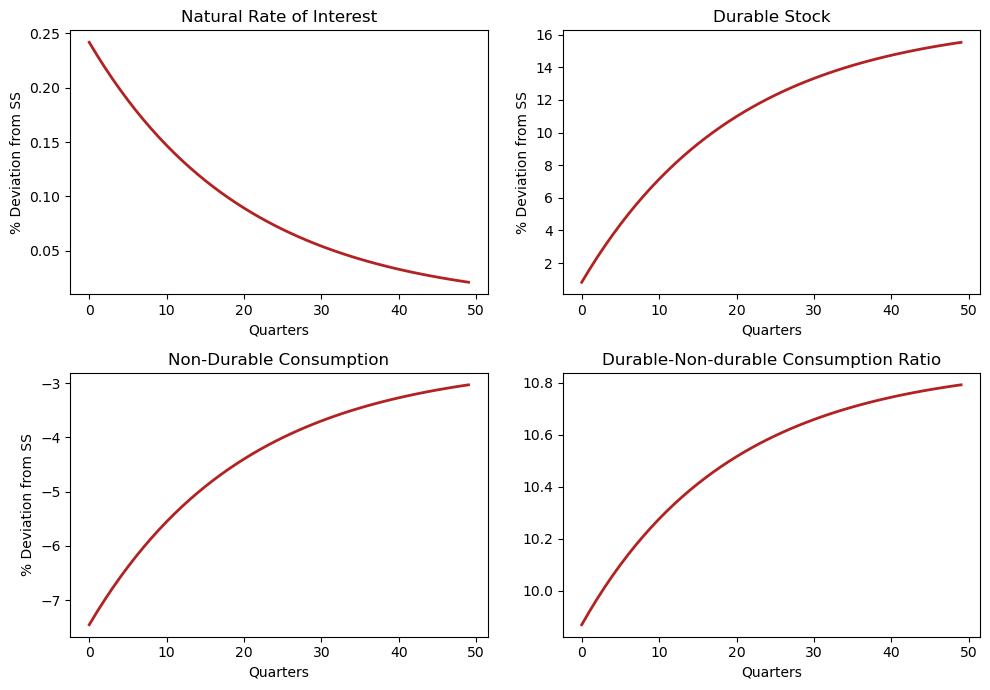

In [17]:
# Plot transition path for r, D, C in ss deviation from old ss
fig, ax = plt.subplots(2, 2, figsize=(10, 7))
ax[0,0].plot(100*rrelold[0][0:50], label='r', color=(178/255,34/255,34/255), linewidth=2)
ax[0,0].set_title('Natural Rate of Interest')
ax[0,0].set_xlabel('Quarters')
ax[0,0].set_ylabel('% Deviation from SS')
ax[0,1].plot(100*Drelold[0][0:50], label='D', color=(178/255,34/255,34/255), linewidth=2)
ax[0,1].set_title('Durable Stock')
ax[0,1].set_xlabel('Quarters')
ax[0,1].set_ylabel('% Deviation from SS')
ax[1,0].plot(100*Crelold[0][0:50], label='C', color=(178/255,34/255,34/255), linewidth=2)
ax[1,0].set_title('Non-Durable Consumption')
ax[1,0].set_xlabel('Quarters')
ax[1,0].set_ylabel('% Deviation from SS')
ax[1,1].plot(Dlvl[0][0:50]/Clvl[0][0:50], label='D/C', color=(178/255,34/255,34/255), linewidth=2)
ax[1,1].set_title('Durable-Non-durable Consumption Ratio')
ax[1,1].set_xlabel('Quarters')
plt.tight_layout()
plt.show()
fig.savefig('noadjcost.png')

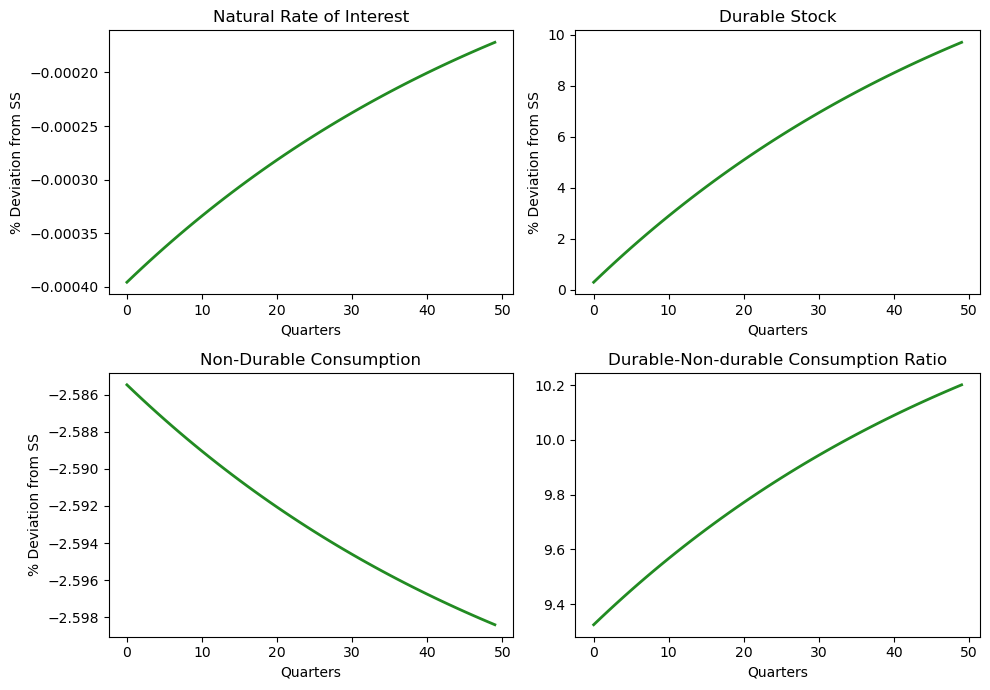

In [27]:
# Plot transition path for r, D, C in ss deviation from old ss
fig, ax = plt.subplots(2, 2, figsize=(10, 7))
ax[0,0].plot(100*rrelold[0][0:50], label='No adj. cost', color=(178/255,34/255,34/255), linewidth=2)
ax[0,0].plot(100*rrelold[1][0:50], label='Convex adj. cost', color=(34/255, 139/255, 34/255), linewidth=2)
ax[0,0].set_title('Natural Rate of Interest')
ax[0,0].set_xlabel('Quarters')
ax[0,0].set_ylabel('% Deviation from SS')
ax[0,0].legend()
ax[0,1].plot(100*Drelold[0][0:50], label='No adj. cost', color=(178/255,34/255,34/255), linewidth=2)
ax[0,1].plot(100*Drelold[1][0:50], label='Convex adj. cost', color=(34/255, 139/255, 34/255), linewidth=2)
ax[0,1].set_title('Durable Stock')
ax[0,1].set_xlabel('Quarters')
ax[0,1].set_ylabel('% Deviation from SS')
ax[0,1].legend()
ax[1,0].plot(100*Crelold[0][0:50], label='No adj. cost', color=(178/255,34/255,34/255), linewidth=2)
ax[1,0].plot(100*Crelold[1][0:50], label='Convex adj. cost', color=(34/255, 139/255, 34/255), linewidth=2)
ax[1,0].set_title('Non-Durable Consumption')
ax[1,0].set_xlabel('Quarters')
ax[1,0].set_ylabel('% Deviation from SS')
ax[1,0].legend()
ax[1,1].plot(Dlvl[0][0:50]/Clvl[0][0:50], label='No adj. cost', color=(178/255,34/255,34/255), linewidth=2)
ax[1,1].plot(Dlvl[1][0:50]/Clvl[1][0:50], label='Convex adj. cost', color=(34/255, 139/255, 34/255), linewidth=2)
ax[1,1].set_title('Durable-Non-durable Consumption Ratio')
ax[1,1].set_ylim(9, 11)
ax[1,1].set_xlabel('Quarters')
ax[1,1].legend()
plt.tight_layout()
plt.show()
fig.savefig('adjcost.png')